# 20 Pandas Functions That Will Boost Your Data Analysis Process - Soner Yıldırım

Original source - https://towardsdatascience.com/20-pandas-functions-that-will-boost-your-data-analysis-process-f5dfdb2f9e05

Topics covered
1. Query
2. Insert
3. Cumsum
4. Sample
5. Where
6. Isin
7. Loc and iloc
8. Pct_change
9. Rank
10. Melt
11. Explode
12. Nunique
13. Lookup
14. Infer_objects
15. Memory_usage
16. Describe
17. Merge
18. Select_dtypes
19. Replace
20. Applymap

In [1]:
import numpy as np
import pandas as pd

## 1. Query

Create sample DF by masking

In [2]:
values_1 = np.random.randint(10, size=10)
values_2 = np.random.randint(10, size=10)

years = np.arange(2010,2020)

groups = ['A','A','B','A','B','B','C','A','C','C']

df = pd.DataFrame({'group':groups, 'year':years, 
                   'value_1':values_1, 'value_2':values_2})

df

,group,year,value_1,value_2
0,A,2010,5,6
1,A,2011,2,9
2,B,2012,7,8
3,A,2013,5,7
4,B,2014,2,3
5,B,2015,6,6
6,C,2016,2,7
7,A,2017,4,3
8,C,2018,3,9
9,C,2019,9,9


In [3]:
df.query('value_1 < value_2')

,group,year,value_1,value_2
0,A,2010,5,6
1,A,2011,2,9
2,B,2012,7,8
3,A,2013,5,7
4,B,2014,2,3
6,C,2016,2,7
8,C,2018,3,9


In [4]:
df.query("group == 'A'" )

,group,year,value_1,value_2
0,A,2010,5,6
1,A,2011,2,9
3,A,2013,5,7
7,A,2017,4,3


In [5]:
df.query('value_1 <= 5')

,group,year,value_1,value_2
0,A,2010,5,6
1,A,2011,2,9
3,A,2013,5,7
4,B,2014,2,3
6,C,2016,2,7
7,A,2017,4,3
8,C,2018,3,9


In [6]:
df.query('group == "A" and value_1 >= 5')

,group,year,value_1,value_2
0,A,2010,5,6
3,A,2013,5,7


## 2. Insert

add new column at any desired position

In [7]:
newCol = np.random.randn(10)

df.insert(2, "New_col_name", newCol)

In [8]:
df

,group,year,New_col_name,value_1,value_2
0,A,2010,-0.071449,5,6
1,A,2011,1.988117,2,9
2,B,2012,-0.251916,7,8
3,A,2013,0.460232,5,7
4,B,2014,0.424495,2,3
5,B,2015,-1.268321,6,6
6,C,2016,0.716834,2,7
7,A,2017,-0.871755,4,3
8,C,2018,0.754214,3,9
9,C,2019,-0.813003,9,9


In [9]:
#column rename
df.rename(columns={"New_col_name": "value_0"}, inplace=True)

In [10]:
df

,group,year,value_0,value_1,value_2
0,A,2010,-0.071449,5,6
1,A,2011,1.988117,2,9
2,B,2012,-0.251916,7,8
3,A,2013,0.460232,5,7
4,B,2014,0.424495,2,3
5,B,2015,-1.268321,6,6
6,C,2016,0.716834,2,7
7,A,2017,-0.871755,4,3
8,C,2018,0.754214,3,9
9,C,2019,-0.813003,9,9


## 3. Cumsum

we will apply 'groupby' and then apply 'cumsum'

In [11]:
df["cummulative"] = df[['value_2','group']].groupby('group').cumsum()
df

,group,year,value_0,value_1,value_2,cummulative
0,A,2010,-0.071449,5,6,6
1,A,2011,1.988117,2,9,15
2,B,2012,-0.251916,7,8,8
3,A,2013,0.460232,5,7,22
4,B,2014,0.424495,2,3,11
5,B,2015,-1.268321,6,6,17
6,C,2016,0.716834,2,7,7
7,A,2017,-0.871755,4,3,25
8,C,2018,0.754214,3,9,16
9,C,2019,-0.813003,9,9,25


In [12]:
df[['value_0','value_1','value_2','group']].groupby('group').cumsum()

,value_0,value_1,value_2
0,-0.071449,5,6
1,1.916668,7,15
2,-0.251916,7,8
3,2.376900,12,22
4,0.172579,9,11
5,-1.095742,15,17
6,0.716834,2,7
7,1.505145,16,25
8,1.471049,5,16
9,0.658046,14,25


In [13]:
df[['value_0','value_1','value_2','group']].groupby('group').sum()

,value_0,value_1,value_2
group,,,
A,1.505145,16,25
B,-1.095742,15,17
C,0.658046,14,25


In [14]:
df[['value_0','value_1','value_2','group']].groupby('group').mean()

,value_0,value_1,value_2
group,,,
A,0.376286,4.000000,6.250000
B,-0.365247,5.000000,5.666667
C,0.219349,4.666667,8.333333


In [15]:
df[['value_0','value_1','value_2','group']].groupby('group').median()

,value_0,value_1,value_2
group,,,
A,0.194391,4.5,6.5
B,-0.251916,6.0,6.0
C,0.716834,3.0,9.0


A         AxesSubplot(0.1,0.559091;0.363636x0.340909)
B    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
C             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

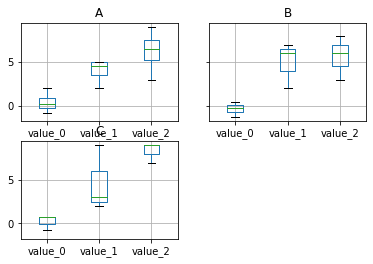

In [16]:
df[['value_0','value_1','value_2','group']].groupby('group').boxplot()

group
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
C    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

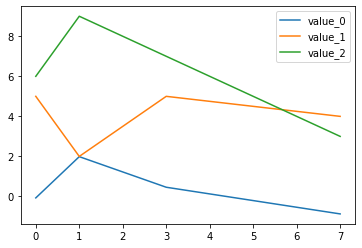

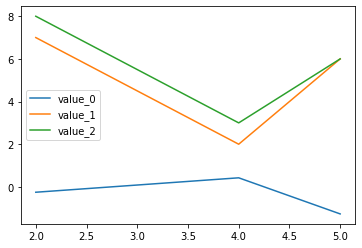

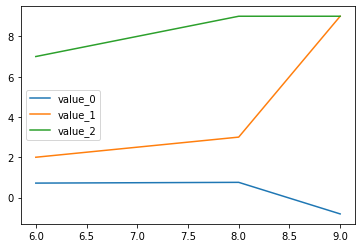

In [17]:
df[['value_0','value_1','value_2','group']].groupby('group').plot()

## 4. Sample

In [18]:
sample1 = df.sample(n=3)
sample1

,group,year,value_0,value_1,value_2,cummulative
8,C,2018,0.754214,3,9,16
9,C,2019,-0.813003,9,9,25
3,A,2013,0.460232,5,7,22


In [19]:
df.sample(n=3)

,group,year,value_0,value_1,value_2,cummulative
0,A,2010,-0.071449,5,6,6
6,C,2016,0.716834,2,7,7
1,A,2011,1.988117,2,9,15


In [20]:
df.sample(n=3)

,group,year,value_0,value_1,value_2,cummulative
0,A,2010,-0.071449,5,6,6
3,A,2013,0.460232,5,7,22
8,C,2018,0.754214,3,9,16


In [21]:
df.sample(frac=0.4)

,group,year,value_0,value_1,value_2,cummulative
6,C,2016,0.716834,2,7,7
8,C,2018,0.754214,3,9,16
4,B,2014,0.424495,2,3,11
2,B,2012,-0.251916,7,8,8


In [22]:
df.sample(frac=0.74)

,group,year,value_0,value_1,value_2,cummulative
6,C,2016,0.716834,2,7,7
1,A,2011,1.988117,2,9,15
2,B,2012,-0.251916,7,8,8
7,A,2017,-0.871755,4,3,25
4,B,2014,0.424495,2,3,11
0,A,2010,-0.071449,5,6,6
3,A,2013,0.460232,5,7,22


## 5. Where

Replace values based on some conditions. If condition fails by default it adds NaN else we can add any other value.

Note: numpy and panda have same usage of where function but differnt syntax

In [23]:
df['value_0'].where(df['value_0'] >0 , 0)

0    0.000000
1    1.988117
2    0.000000
3    0.460232
4    0.424495
5    0.000000
6    0.716834
7    0.000000
8    0.754214
9    0.000000
Name: value_0, dtype: float64

In [24]:
df['value_0'].where(df['value_0'] >0 , "Cool this is dope")

0    Cool this is dope
1              1.98812
2    Cool this is dope
3             0.460232
4             0.424495
5    Cool this is dope
6             0.716834
7    Cool this is dope
8             0.754214
9    Cool this is dope
Name: value_0, dtype: object

In [25]:
np.where(df['value_0'] > 0, df['value_0'], 0)

array([0.        , 1.98811747, 0.        , 0.46023154, 0.42449501,
       0.        , 0.71683412, 0.        , 0.75421447, 0.        ])

In [26]:
np.where(df['value_0'] > 0, df['value_0'],"Where am I")

array(['Where am I', '1.9881174747314223', 'Where am I',
       '0.46023154337444006', '0.4244950125299415', 'Where am I',
       '0.7168341236684392', 'Where am I', '0.7542144714429838',
       'Where am I'], dtype='<U32')

## 6. Isin

In [27]:
years = ['2014', '2017', '2018']
df[df.year.isin(years)]

,group,year,value_0,value_1,value_2,cummulative
4,B,2014,0.424495,2,3,11
7,A,2017,-0.871755,4,3,25
8,C,2018,0.754214,3,9,16


In [28]:
years = np.arange(2011,2017)
df[df.year.isin(years)]

,group,year,value_0,value_1,value_2,cummulative
1,A,2011,1.988117,2,9,15
2,B,2012,-0.251916,7,8,8
3,A,2013,0.460232,5,7,22
4,B,2014,0.424495,2,3,11
5,B,2015,-1.268321,6,6,17
6,C,2016,0.716834,2,7,7


In [29]:
years = np.arange(2011,2017)
groups = ["A","C"]
df[df.year.isin(years) & df.group.isin(groups)]

,group,year,value_0,value_1,value_2,cummulative
1,A,2011,1.988117,2,9,15
3,A,2013,0.460232,5,7,22
6,C,2016,0.716834,2,7,7


## 7. Loc and iloc

In [30]:
df.iloc[:3,:2]

,group,year
0,A,2010
1,A,2011
2,B,2012


In [31]:
df.iloc[:3,:]

,group,year,value_0,value_1,value_2,cummulative
0,A,2010,-0.071449,5,6,6
1,A,2011,1.988117,2,9,15
2,B,2012,-0.251916,7,8,8


In [32]:
df.iloc[:,2:]

,value_0,value_1,value_2,cummulative
0,-0.071449,5,6,6
1,1.988117,2,9,15
2,-0.251916,7,8,8
3,0.460232,5,7,22
4,0.424495,2,3,11
5,-1.268321,6,6,17
6,0.716834,2,7,7
7,-0.871755,4,3,25
8,0.754214,3,9,16
9,-0.813003,9,9,25


In [33]:
df.iloc[5:7,2:4]

,value_0,value_1
5,-1.268321,6
6,0.716834,2


In [34]:
df.iloc[5:8,2:5]

,value_0,value_1,value_2
5,-1.268321,6,6
6,0.716834,2,7
7,-0.871755,4,3


In [35]:
df.iloc[5:5,2:5]

,value_0,value_1,value_2


In [36]:
df.iloc[5:6,2:5]

,value_0,value_1,value_2
5,-1.268321,6,6


In [37]:
df.loc[:,["group"]]

,group
0,A
1,A
2,B
3,A
4,B
5,B
6,C
7,A
8,C
9,C


In [38]:
df.loc[1:5,["group"]]

,group
1,A
2,B
3,A
4,B
5,B


In [39]:
df.loc[1:5,["group", "value_1"]]

,group,value_1
1,A,2
2,B,7
3,A,5
4,B,2
5,B,6


In [40]:
df.loc[1:5,["group", "value_1",'cummulative']]

,group,value_1,cummulative
1,A,2,15
2,B,7,8
3,A,5,22
4,B,2,11
5,B,6,17


In [41]:
df.loc[[0,2,3,7,8],["group", "value_1",'cummulative']]

,group,value_1,cummulative
0,A,5,6
2,B,7,8
3,A,5,22
7,A,4,25
8,C,3,16


## 8. Pct_change

percentage change in values of series

In [42]:
df.value_1.pct_change()

0         NaN
1   -0.600000
2    2.500000
3   -0.285714
4   -0.600000
5    2.000000
6   -0.666667
7    1.000000
8   -0.250000
9    2.000000
Name: value_1, dtype: float64

In [43]:
df.value_0.pct_change()

0          NaN
1   -28.825587
2    -1.126711
3    -2.826926
4    -0.077649
5    -3.987835
6    -1.565183
7    -2.216118
8    -1.865168
9    -2.077946
Name: value_0, dtype: float64

## 9. Rank

In [44]:
df["rank_0"] = df["value_0"].rank()
df

,group,year,value_0,value_1,value_2,cummulative,rank_0
0,A,2010,-0.071449,5,6,6,5.0
1,A,2011,1.988117,2,9,15,10.0
2,B,2012,-0.251916,7,8,8,4.0
3,A,2013,0.460232,5,7,22,7.0
4,B,2014,0.424495,2,3,11,6.0
5,B,2015,-1.268321,6,6,17,1.0
6,C,2016,0.716834,2,7,7,8.0
7,A,2017,-0.871755,4,3,25,2.0
8,C,2018,0.754214,3,9,16,9.0
9,C,2019,-0.813003,9,9,25,3.0


In [45]:
rank_1 = df["value_1"].rank()
df.insert(4, "rank_1", rank_1)

In [46]:
df

,group,year,value_0,value_1,rank_1,value_2,cummulative,rank_0
0,A,2010,-0.071449,5,6.5,6,6,5.0
1,A,2011,1.988117,2,2.0,9,15,10.0
2,B,2012,-0.251916,7,9.0,8,8,4.0
3,A,2013,0.460232,5,6.5,7,22,7.0
4,B,2014,0.424495,2,2.0,3,11,6.0
5,B,2015,-1.268321,6,8.0,6,17,1.0
6,C,2016,0.716834,2,2.0,7,7,8.0
7,A,2017,-0.871755,4,5.0,3,25,2.0
8,C,2018,0.754214,3,4.0,9,16,9.0
9,C,2019,-0.813003,9,10.0,9,25,3.0


## 10. Melt

In [47]:
df.columns

Index(['group', 'year', 'value_0', 'value_1', 'rank_1', 'value_2',
       'cummulative', 'rank_0'],
      dtype='object')

In [48]:
df[['group', 'value_0', 'value_1', 'value_2']]

,group,value_0,value_1,value_2
0,A,-0.071449,5,6
1,A,1.988117,2,9
2,B,-0.251916,7,8
3,A,0.460232,5,7
4,B,0.424495,2,3
5,B,-1.268321,6,6
6,C,0.716834,2,7
7,A,-0.871755,4,3
8,C,0.754214,3,9
9,C,-0.813003,9,9


In [49]:
df[['group', 'value_0', 'value_1', 'value_2']].melt(id_vars=['group'])

,group,variable,value
0,A,value_0,-0.071449
1,A,value_0,1.988117
2,B,value_0,-0.251916
3,A,value_0,0.460232
4,B,value_0,0.424495
5,B,value_0,-1.268321
6,C,value_0,0.716834
7,A,value_0,-0.871755
8,C,value_0,0.754214
9,C,value_0,-0.813003


In [50]:
df[['group','year', 'value_0', 'value_1', 'value_2']].melt(id_vars=['group'])

,group,variable,value
0,A,year,2010.000000
1,A,year,2011.000000
2,B,year,2012.000000
3,A,year,2013.000000
4,B,year,2014.000000
5,B,year,2015.000000
6,C,year,2016.000000
7,A,year,2017.000000
8,C,year,2018.000000
9,C,year,2019.000000


In [51]:
df[['group','year', 'value_0', 'value_1', 'value_2']].melt(id_vars=['group', 'year'])

,group,year,variable,value
0,A,2010,value_0,-0.071449
1,A,2011,value_0,1.988117
2,B,2012,value_0,-0.251916
3,A,2013,value_0,0.460232
4,B,2014,value_0,0.424495
5,B,2015,value_0,-1.268321
6,C,2016,value_0,0.716834
7,A,2017,value_0,-0.871755
8,C,2018,value_0,0.754214
9,C,2019,value_0,-0.813003


## 11. Explode

In [52]:
df1 = pd.DataFrame({'ID': ["a", "b", "c"], 'measurement': [4, 6,[2,3,8]],"day":[1,1,1]})

In [53]:
df1

,ID,measurement,day
0,a,4,1
1,b,6,1
2,c,"[2, 3, 8]",1


In [54]:
df1.explode('measurement')

,ID,measurement,day
0,a,4,1
1,b,6,1
2,c,2,1
2,c,3,1
2,c,8,1


In [55]:
df1.explode('measurement').reset_index(drop=True)

,ID,measurement,day
0,a,4,1
1,b,6,1
2,c,2,1
3,c,3,1
4,c,8,1


## 12. Nunique

In [56]:
df.year.nunique()

10

In [57]:
df.group.unique()

array(['A', 'B', 'C'], dtype=object)

In [58]:
df.group.nunique()

3

In [59]:
df.group.value_counts()

A    4
C    3
B    3
Name: group, dtype: int64

In [60]:
df.groupby("group").mean()

,year,value_0,value_1,rank_1,value_2,cummulative,rank_0
group,,,,,,,
A,2012.750000,0.376286,4.000000,5.000000,6.250000,17.0,6.000000
B,2013.666667,-0.365247,5.000000,6.333333,5.666667,12.0,3.666667
C,2017.666667,0.219349,4.666667,5.333333,8.333333,16.0,6.666667


## 13. Lookup

In [62]:
df.columns


Index(['group', 'year', 'value_0', 'value_1', 'rank_1', 'value_2',
       'cummulative', 'rank_0'],
      dtype='object')

In [71]:
df2 = pd.DataFrame({'Day':[1,2,3,4], 'Person': ["a", "b", "a", "d"], 'a': [4,7,3,9], 'b': [4, 6,9,1],  'd': [6, 2,1,8]})

In [72]:
df2

,Day,Person,a,b,d
0,1,a,4,4,6
1,2,b,7,6,2
2,3,a,3,9,1
3,4,d,9,1,8


In [73]:
df2['Person_point'] = df2.lookup(df2.index, df2['Person'])
df2

,Day,Person,a,b,d,Person_point
0,1,a,4,4,6,4
1,2,b,7,6,2,6
2,3,a,3,9,1,3
3,4,d,9,1,8,8


## 14. Infer_objects (Ignore)

In [74]:
df2.infer_objects().dtypes

Day              int64
Person          object
a                int64
b                int64
d                int64
Person_point     int64
dtype: object

In [80]:
df1.infer_objects().dtypes

ID             object
measurement    object
day             int64
dtype: object

In [81]:
df.infer_objects().dtypes

group           object
year             int32
value_0        float64
value_1          int32
rank_1         float64
value_2          int32
cummulative      int32
rank_0         float64
dtype: object

In [82]:
df3 = pd.DataFrame({'A': ["a", "b", "c"], 
                    'B': [4, 6,[2,3,8]],
                    "C":[1,1,1],
                    "D":[True,True,False],
                    "E":[1.2,1.4,1.9],})

In [84]:
df3.dtypes

A     object
B     object
C      int64
D       bool
E    float64
dtype: object

In [87]:
df3.infer_objects().dtypes

A     object
B     object
C      int64
D       bool
E    float64
dtype: object

## 15. Memory_usage

In [98]:
df_large = pd.DataFrame({'A': np.random.randn(1000000),
                    'B': np.random.randint(100, size=1000000)})

In [99]:
df_large.shape

(1000000, 2)

In [100]:
df_large.memory_usage()

Index        128
A        8000000
B        4000000
dtype: int64

In [101]:
df_large.memory_usage().sum() / (1024**2) #converting to megabytes

11.4442138671875

## 16. Describe

In [102]:
df3.describe()

,C,E
count,3.0,3.000000
mean,1.0,1.500000
std,0.0,0.360555
min,1.0,1.200000
25%,1.0,1.300000
50%,1.0,1.400000
75%,1.0,1.650000
max,1.0,1.900000


In [103]:
df.describe

<bound method NDFrame.describe of   group  year   value_0  value_1  rank_1  value_2  cummulative  rank_0
0     A  2010 -0.071449        5     6.5        6            6     5.0
1     A  2011  1.988117        2     2.0        9           15    10.0
2     B  2012 -0.251916        7     9.0        8            8     4.0
3     A  2013  0.460232        5     6.5        7           22     7.0
4     B  2014  0.424495        2     2.0        3           11     6.0
5     B  2015 -1.268321        6     8.0        6           17     1.0
6     C  2016  0.716834        2     2.0        7            7     8.0
7     A  2017 -0.871755        4     5.0        3           25     2.0
8     C  2018  0.754214        3     4.0        9           16     9.0
9     C  2019 -0.813003        9    10.0        9           25     3.0>

In [104]:
df.describe()

,year,value_0,value_1,rank_1,value_2,cummulative,rank_0
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,2014.50000,0.106745,4.500000,5.500000,6.700000,15.200000,5.50000
std,3.02765,0.966753,2.368778,2.981424,2.263233,7.177124,3.02765
min,2010.00000,-1.268321,2.000000,2.000000,3.000000,6.000000,1.00000
25%,2012.25000,-0.672731,2.250000,2.500000,6.000000,8.750000,3.25000
50%,2014.50000,0.176523,4.500000,5.750000,7.000000,15.500000,5.50000
75%,2016.75000,0.652683,5.750000,7.625000,8.750000,20.750000,7.75000
max,2019.00000,1.988117,9.000000,10.000000,9.000000,25.000000,10.00000


## 17. Merge

In [146]:
dfm1 = pd.DataFrame({'A': ["a", "b", "c"], 
                     'B': [1,2,3],
                     "C":[True,True,False],
                     "D":[1.2,1.4,1.9]})

dfm2 = pd.DataFrame({'A': ["k", "b", "l"], 
                     'B': [1, 2, 7],
                     "C":[False,False,False],
                     "D":[2.2,3.4,7.9]})

In [147]:
dfm1

,A,B,C,D
0,a,1,True,1.2
1,b,2,True,1.4
2,c,3,False,1.9


In [148]:
dfm2

,A,B,C,D
0,k,1,False,2.2
1,b,2,False,3.4
2,l,7,False,7.9


In [149]:
pd.merge(dfm1,dfm2)

,A,B,C,D


In [150]:
pd.merge(dfm1,dfm2, on="A")

,A,B_x,C_x,D_x,B_y,C_y,D_y
0,b,2,True,1.4,2,False,3.4


In [151]:
pd.merge(dfm1,dfm2, on="B")

,A_x,B,C_x,D_x,A_y,C_y,D_y
0,a,1,True,1.2,k,False,2.2
1,b,2,True,1.4,b,False,3.4


In [153]:
pd.merge(dfm1,dfm2, on="B",suffixes=('_left', '_right'))

,A_left,B,C_left,D_left,A_right,C_right,D_right
0,a,1,True,1.2,k,False,2.2
1,b,2,True,1.4,b,False,3.4


In [154]:
dfm1.merge(dfm2, left_on='B', right_on='B')

,A_x,B,C_x,D_x,A_y,C_y,D_y
0,a,1,True,1.2,k,False,2.2
1,b,2,True,1.4,b,False,3.4


## 18. Select_dtypes

In [109]:
df.select_dtypes(include='int64')

""
0
1
2
3
4
5
6
7
8
9


In [110]:
df.select_dtypes(include='int')

,year,value_1,value_2,cummulative
0,2010,5,6,6
1,2011,2,9,15
2,2012,7,8,8
3,2013,5,7,22
4,2014,2,3,11
5,2015,6,6,17
6,2016,2,7,7
7,2017,4,3,25
8,2018,3,9,16
9,2019,9,9,25


In [111]:
df.select_dtypes(include='float')

,value_0,rank_1,rank_0
0,-0.071449,6.5,5.0
1,1.988117,2.0,10.0
2,-0.251916,9.0,4.0
3,0.460232,6.5,7.0
4,0.424495,2.0,6.0
5,-1.268321,8.0,1.0
6,0.716834,2.0,8.0
7,-0.871755,5.0,2.0
8,0.754214,4.0,9.0
9,-0.813003,10.0,3.0


In [112]:
df.select_dtypes(exclude='float')

,group,year,value_1,value_2,cummulative
0,A,2010,5,6,6
1,A,2011,2,9,15
2,B,2012,7,8,8
3,A,2013,5,7,22
4,B,2014,2,3,11
5,B,2015,6,6,17
6,C,2016,2,7,7
7,A,2017,4,3,25
8,C,2018,3,9,16
9,C,2019,9,9,25


## 19. Replace

In [113]:
df.replace('A', 'A_1')

,group,year,value_0,value_1,rank_1,value_2,cummulative,rank_0
0,A_1,2010,-0.071449,5,6.5,6,6,5.0
1,A_1,2011,1.988117,2,2.0,9,15,10.0
2,B,2012,-0.251916,7,9.0,8,8,4.0
3,A_1,2013,0.460232,5,6.5,7,22,7.0
4,B,2014,0.424495,2,2.0,3,11,6.0
5,B,2015,-1.268321,6,8.0,6,17,1.0
6,C,2016,0.716834,2,2.0,7,7,8.0
7,A_1,2017,-0.871755,4,5.0,3,25,2.0
8,C,2018,0.754214,3,4.0,9,16,9.0
9,C,2019,-0.813003,9,10.0,9,25,3.0


In [114]:
df

,group,year,value_0,value_1,rank_1,value_2,cummulative,rank_0
0,A,2010,-0.071449,5,6.5,6,6,5.0
1,A,2011,1.988117,2,2.0,9,15,10.0
2,B,2012,-0.251916,7,9.0,8,8,4.0
3,A,2013,0.460232,5,6.5,7,22,7.0
4,B,2014,0.424495,2,2.0,3,11,6.0
5,B,2015,-1.268321,6,8.0,6,17,1.0
6,C,2016,0.716834,2,2.0,7,7,8.0
7,A,2017,-0.871755,4,5.0,3,25,2.0
8,C,2018,0.754214,3,4.0,9,16,9.0
9,C,2019,-0.813003,9,10.0,9,25,3.0


In [115]:
df.replace({'A':'A_1','B':'B_1',})

,group,year,value_0,value_1,rank_1,value_2,cummulative,rank_0
0,A_1,2010,-0.071449,5,6.5,6,6,5.0
1,A_1,2011,1.988117,2,2.0,9,15,10.0
2,B_1,2012,-0.251916,7,9.0,8,8,4.0
3,A_1,2013,0.460232,5,6.5,7,22,7.0
4,B_1,2014,0.424495,2,2.0,3,11,6.0
5,B_1,2015,-1.268321,6,8.0,6,17,1.0
6,C,2016,0.716834,2,2.0,7,7,8.0
7,A_1,2017,-0.871755,4,5.0,3,25,2.0
8,C,2018,0.754214,3,4.0,9,16,9.0
9,C,2019,-0.813003,9,10.0,9,25,3.0


## 20. Applymap

In [123]:
df[['value_0','rank_1']].mean()

value_0    0.106745
rank_1     5.500000
dtype: float64

In [116]:
def color_negative_values(val):
   color = 'red' if val < 0 else 'black'
   return 'color: %s' % color

In [122]:
df[['value_0','rank_1']].style.applymap(color_negative_values)

,value_0,rank_1
0,-0.071449,6.500000
1,1.988117,2.000000
2,-0.251916,9.000000
3,0.460232,6.500000
4,0.424495,2.000000
5,-1.268321,8.000000
6,0.716834,2.000000
7,-0.871755,5.000000
8,0.754214,4.000000
9,-0.813003,10.000000


In [119]:
df

,group,year,value_0,value_1,rank_1,value_2,cummulative,rank_0
0,A,2010,-0.071449,5,6.5,6,6,5.0
1,A,2011,1.988117,2,2.0,9,15,10.0
2,B,2012,-0.251916,7,9.0,8,8,4.0
3,A,2013,0.460232,5,6.5,7,22,7.0
4,B,2014,0.424495,2,2.0,3,11,6.0
5,B,2015,-1.268321,6,8.0,6,17,1.0
6,C,2016,0.716834,2,2.0,7,7,8.0
7,A,2017,-0.871755,4,5.0,3,25,2.0
8,C,2018,0.754214,3,4.0,9,16,9.0
9,C,2019,-0.813003,9,10.0,9,25,3.0


## 21. Highlight data Experiment (my addition)

In [136]:
def highlight_max(x):
    return ['background-color: yellow' if v <= x.mean() else ''
                for v in x]

df = pd.DataFrame(np.random.randn(15, 2))
df.style.apply(highlight_max)

,0,1
0,0.289789,0.570498
1,0.820546,1.700442
2,0.345094,0.031805
3,-1.343018,0.089023
4,0.542348,0.156838
5,1.069433,0.457972
6,0.461045,-0.044863
7,-0.680321,-0.293609
8,-0.659375,0.478967
9,0.291243,0.073923


In [138]:
def highlight_max(x):
    return ['background-color: yellow' if v == x.max() else ''
                for v in x]

df = pd.DataFrame(np.random.randn(15, 2))
df.style.apply(highlight_max)

,0,1
0,-0.058001,-0.627194
1,0.448573,0.760033
2,0.702654,-0.766911
3,-1.166887,0.219165
4,-0.103158,0.068807
5,0.674041,-0.371674
6,0.107742,0.479878
7,-1.245334,0.084259
8,-0.074553,0.577347
9,-1.090610,1.530326


In [144]:
def highlight_max(x):
    styledata = []
    for v in x:
        if v == x.max():
            styledata.append('background-color: red') 
        elif  v == x.min():
            styledata.append('background-color: green')  
        else:
            styledata.append('')
    return styledata

df = pd.DataFrame(np.random.randn(15, 2))
df.style.apply(highlight_max)

,0,1
0,-1.997359,0.505912
1,-1.626218,0.426357
2,0.241192,0.620975
3,-0.744866,-0.323875
4,-1.707976,0.770899
5,1.006171,-0.517807
6,-0.112182,-0.087181
7,0.144204,0.642924
8,-1.970195,-0.871087
9,-1.571103,-0.427650
